# Classification algorithms applied to vehicle environmental pollution
*By: Xavier Torres* 

We have a dataset containing information regarding the **taxi fleet** of a highly populated city in Spain, with more than 15.000 vehicles and their license to operate in the city. Each license may have a single vehicle assigned. 

In the dataset you can find historical data of the taxi fleet, indicating, for each vehicle, its registration, brand, model, fuel, power, number of seats, etc.

Our aim is to analyze the available datset doing an Exploratory Data Analysis, and after that, **build an algorithm to classify environmentaly each vehicle**. To simplify, features of the model will be based on the car registration Year and fuel type.

We will face the work following the next tasks: 

1. [Data upload](#section1)
1. [EDA (Exploratory Data Analysis), data cleaning and feature engineering](#section2)
1. [Classification models](#section3)
1. [Model Selection](#section4)

---

 ![image_not_available](https://raw.githubusercontent.com/torresxavier/Resources/master/pollution2.jpg)

## <a name="section1"> 1. Data upload </a>

In [2]:
#importinf needed libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
#from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB

from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support as score

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("taxiFlota.csv", sep = ";")

In [4]:
df.head()

,Codigo,Matricula,Fecha Matriculacion,Marca,Modelo,Tipo,Variante,Clasificacion medioambiental,Combustible,Cilindrada,Potencia,Numero de Plazas,Fecha inicio de prestacion del servicio de taxi,Eurotaxi,Regimen Especial de Eurotaxi,Fecha inicio Regimen Especial Eurotaxi,Fecha fin Regimen Especial Eurotaxi,Fecha
0,1198109,0800GZC,18/10/2010,CHEVROLET,EPICA,KLAL,LV3/134,B,DIESEL,1991,110.0,5,25/10/2010,NO,NO,NaN,NaN,30/07/2018
1,1196804,7686GYS,23/09/2010,CHEVROLET,EPICA,KLAL,LV1/111,C,GASOLINA TRANSFORMADO GLP,1993,105.0,5,04/10/2010,NO,NO,NaN,NaN,30/07/2018
2,1182347,5440GTD,02/02/2010,CHEVROLET,EPICA,KLAL,LV3/134,B,DIESEL,1991,110.0,5,04/02/2010,NO,NO,NaN,NaN,30/07/2018
3,1189908,3259GWN,21/05/2010,CHEVROLET,EPICA,KLAL,LV3/134,B,DIESEL,1991,110.0,5,24/05/2010,NO,NO,NaN,NaN,30/07/2018
4,1180158,9107GSN,29/12/2009,CHEVROLET,EPICA,KLAL,LV3/134,B,DIESEL,1991,110.0,5,04/01/2010,NO,NO,NaN,NaN,30/07/2018


## <a name="section2"> 2. EDA (Exploratory Data Analysis), data cleaning and feature engineering </a>

Checking number of rows, columns, and other info:

In [5]:
df.shape

(46918, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46918 entries, 0 to 46917
Data columns (total 18 columns):
Codigo                                             46918 non-null int64
Matricula                                          46918 non-null object
Fecha Matriculacion                                46918 non-null object
Marca                                              46918 non-null object
Modelo                                             46918 non-null object
Tipo                                               46918 non-null object
Variante                                           46918 non-null object
Clasificacion medioambiental                       46918 non-null object
Combustible                                        46918 non-null object
Cilindrada                                         46918 non-null int64
Potencia                                           46913 non-null float64
Numero de Plazas                                   46918 non-null object
Fecha inicio de 

In [7]:
df.groupby(by="Matricula").count()

,Codigo,Fecha Matriculacion,Marca,Modelo,Tipo,Variante,Clasificacion medioambiental,Combustible,Cilindrada,Potencia,Numero de Plazas,Fecha inicio de prestacion del servicio de taxi,Eurotaxi,Regimen Especial de Eurotaxi,Fecha inicio Regimen Especial Eurotaxi,Fecha fin Regimen Especial Eurotaxi,Fecha
Matricula,,,,,,,,,,,,,,,,,
0000HDY,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,0,3
0000HTS,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,0,3
0000JYG,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,0,3
0001HFW,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,0,3
0002JVL,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9998GSC,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,0,3
9998HTL,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,0,3
9999GZL,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0,0,3


we see that we have 3 rows per each licence plate. Let's check a couple of licence plates to see the information contained.

In [8]:
df[(df['Matricula'] == '0001HFW') | (df['Matricula'] == '9998HTL')].sort_values(by='Matricula')

,Codigo,Matricula,Fecha Matriculacion,Marca,Modelo,Tipo,Variante,Clasificacion medioambiental,Combustible,Cilindrada,Potencia,Numero de Plazas,Fecha inicio de prestacion del servicio de taxi,Eurotaxi,Regimen Especial de Eurotaxi,Fecha inicio Regimen Especial Eurotaxi,Fecha fin Regimen Especial Eurotaxi,Fecha
10625,1229223,0001HFW,04/08/2011,SKODA,OCTAVIA,1Z,AACAYCX01/NFM5***,B,DIESEL,1598,77.0,5,05/08/2011,NO,NO,NaN,NaN,30/07/2018
26222,1229223,0001HFW,04/08/2011,SKODA,OCTAVIA,1Z,AACAYCX01/NFM5***,B,DIESEL,1598,77.0,5,05/08/2011,NO,NO,NaN,NaN,30/08/2018
41836,1229223,0001HFW,04/08/2011,SKODA,OCTAVIA,1Z,AACAYCX01/NFM5***,B,DIESEL,1598,77.0,5,05/08/2011,NO,NO,NaN,NaN,29/09/2018
3295,1307914,9998HTL,07/11/2013,PEUGEOT,5008,0,0ARHE*,B,DIESEL,1997,110.0,5,11/11/2013,NO,NO,NaN,NaN,30/07/2018
18991,1307914,9998HTL,07/11/2013,PEUGEOT,5008,0,0ARHE*,B,DIESEL,1997,110.0,5,11/11/2013,NO,NO,NaN,NaN,30/08/2018
34719,1307914,9998HTL,07/11/2013,PEUGEOT,5008,0,0ARHE*,B,DIESEL,1997,110.0,5,11/11/2013,NO,NO,NaN,NaN,29/09/2018


We note that all features have the same values except the last column that indicates the date this information was extracted (July, August and September 2018). So we are going to create a new dataset that contains only one of these three months.

First of all we are going to assign DateTime types to all columns containing dates.

In [9]:
df['Fecha Matriculacion'] =  pd.to_datetime(df['Fecha Matriculacion'])
df['Fecha inicio de prestacion del servicio de taxi'] =  pd.to_datetime(df['Fecha inicio de prestacion del servicio de taxi'])
df['Fecha inicio Regimen Especial Eurotaxi'] =  pd.to_datetime(df['Fecha inicio Regimen Especial Eurotaxi'])
df['Fecha fin Regimen Especial Eurotaxi'] =  pd.to_datetime(df['Fecha fin Regimen Especial Eurotaxi'])
df['Fecha'] =  pd.to_datetime(df['Fecha'])

In [10]:
df[(df['Matricula'] == '0001HFW') | (df['Matricula'] == '9998HTL')].sort_values(by='Matricula')

,Codigo,Matricula,Fecha Matriculacion,Marca,Modelo,Tipo,Variante,Clasificacion medioambiental,Combustible,Cilindrada,Potencia,Numero de Plazas,Fecha inicio de prestacion del servicio de taxi,Eurotaxi,Regimen Especial de Eurotaxi,Fecha inicio Regimen Especial Eurotaxi,Fecha fin Regimen Especial Eurotaxi,Fecha
10625,1229223,0001HFW,2011-04-08,SKODA,OCTAVIA,1Z,AACAYCX01/NFM5***,B,DIESEL,1598,77.0,5,2011-05-08,NO,NO,NaT,NaT,2018-07-30
26222,1229223,0001HFW,2011-04-08,SKODA,OCTAVIA,1Z,AACAYCX01/NFM5***,B,DIESEL,1598,77.0,5,2011-05-08,NO,NO,NaT,NaT,2018-08-30
41836,1229223,0001HFW,2011-04-08,SKODA,OCTAVIA,1Z,AACAYCX01/NFM5***,B,DIESEL,1598,77.0,5,2011-05-08,NO,NO,NaT,NaT,2018-09-29
3295,1307914,9998HTL,2013-07-11,PEUGEOT,5008,0,0ARHE*,B,DIESEL,1997,110.0,5,2013-11-11,NO,NO,NaT,NaT,2018-07-30
18991,1307914,9998HTL,2013-07-11,PEUGEOT,5008,0,0ARHE*,B,DIESEL,1997,110.0,5,2013-11-11,NO,NO,NaT,NaT,2018-08-30
34719,1307914,9998HTL,2013-07-11,PEUGEOT,5008,0,0ARHE*,B,DIESEL,1997,110.0,5,2013-11-11,NO,NO,NaT,NaT,2018-09-29


Let's check hoy many observations with 'Fecha' equal to July, August or September:

In [11]:
print('July nrows =', df[df['Fecha'] == '2018-07-30'].shape[0]) #number of rows from July 2018
print('August nrows =', df[df['Fecha'] == '2018-08-30'].shape[0]) #number of rows from August 2018
print('September nrows =', df[df['Fecha'] == '2018-09-29'].shape[0]) #number of rows from September 2018

July nrows = 15638
August nrows = 15640
September nrows = 15640


Ok. It looks like ther are a couple of missing datapoint for July, so to downsize our dataset we will can use august or September. We will use the last information available, i.e. September.

In [12]:
df_new = df[df['Fecha'] == '2018-09-29']

In [13]:
df_new.shape

(15640, 18)

In [14]:
df_new.head(2)

,Codigo,Matricula,Fecha Matriculacion,Marca,Modelo,Tipo,Variante,Clasificacion medioambiental,Combustible,Cilindrada,Potencia,Numero de Plazas,Fecha inicio de prestacion del servicio de taxi,Eurotaxi,Regimen Especial de Eurotaxi,Fecha inicio Regimen Especial Eurotaxi,Fecha fin Regimen Especial Eurotaxi,Fecha
31278,1198109,0800GZC,2010-10-18,CHEVROLET,EPICA,KLAL,LV3/134,B,DIESEL,1991,110.0,5,2010-10-25,NO,NO,NaT,NaT,2018-09-29
31279,1196804,7686GYS,2010-09-23,CHEVROLET,EPICA,KLAL,LV1/111,C,GASOLINA TRANSFORMADO GLP,1993,105.0,5,2010-04-10,NO,NO,NaT,NaT,2018-09-29


Good. Let's now check how many nulls do we have per row. 

In [15]:
# Checking quantity of missing data. 
def null_cols(data):

    """
    This function takes a dataframe df and shows the columns of df that have NaN values
    and the number of them

    """
    nulls = data.isna().sum()
    nulls = nulls[nulls > 0] / len(data) * 100
    nulls = pd.DataFrame(nulls.sort_values(ascending = False))
    nulls = nulls.reset_index().rename(columns = {"index": "Feature", 0: "% Null rows"})
    return nulls

In [16]:
null_cols(df_new)

,Feature,% Null rows
0,Fecha fin Regimen Especial Eurotaxi,96.700767
1,Fecha inicio Regimen Especial Eurotaxi,96.700767
2,Potencia,0.012788


Great. These features won't be needed for modelling, so we can forget about filling nulls. One option to deal with nulls, i.e. with "Potencia" (tr. Horse Power), should be to drop these rows, or to fill these NaN values using k-nearest neighbors algorithm with `from sklearn.impute import KNNImputer`

- **Analysis of features and target**

In [17]:
df_new.describe() #basic stats for numeric features

,Codigo,Cilindrada,Potencia
count,1.564000e+04,15640.000000,15638.000000
mean,1.359953e+06,1682.342519,79.036207
std,9.993767e+04,170.640876,9.966666
min,5.501600e+05,0.000000,0.000000
25%,1.289659e+06,1598.000000,73.000000
50%,1.353722e+06,1598.000000,77.000000
75%,1.441324e+06,1798.000000,85.000000
max,1.524506e+06,3498.000000,193.000000


In [18]:
df_new.describe(include = ['object','datetime64']) #basic stats for rest of features

,Matricula,Fecha Matriculacion,Marca,Modelo,Tipo,Variante,Clasificacion medioambiental,Combustible,Numero de Plazas,Fecha inicio de prestacion del servicio de taxi,Eurotaxi,Regimen Especial de Eurotaxi,Fecha inicio Regimen Especial Eurotaxi,Fecha fin Regimen Especial Eurotaxi,Fecha
count,15640,15640,15640,15640,15640,15640,15640,15640,15640,15640,15640,15640,516,516,15640
unique,15640,2365,17,66,54,197,4,7,14,2245,2,2,265,2,1
top,1452JJV,2012-02-01 00:00:00,SKODA,PRIUS,NH,ZVW30(H),ECO,DIESEL,5,2018-05-30 00:00:00,NO,NO,2015-07-04 00:00:00,2023-11-07 00:00:00,2018-09-29 00:00:00
freq,1,28,4339,2869,3525,2851,7064,8509,15154,33,15100,15124,39,273,15640
first,NaN,2007-06-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-07-23 00:00:00,NaN,NaN,2015-01-09 00:00:00,2021-07-04 00:00:00,2018-09-29 00:00:00
last,NaN,2018-12-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-12-09 00:00:00,NaN,NaN,2018-12-07 00:00:00,2023-11-07 00:00:00,2018-09-29 00:00:00


Some issues to take into account: Top target value is 'ECO'. Top Fuel is 'DIESEL', and there are 7 types of fuel. Average Horse Power is 79. Average engine capacity is 1682 cc. There are 17 brands represented in the dataset.

### Let's now explore the target variable **'Clasificacion medioambiental'**:

What unique values does our target variable have? And what about fuel type?

In [19]:
df_new['Clasificacion medioambiental'].unique()

array(['B', 'C', 'ECO', '0'], dtype=object)

In [20]:
df_new['Combustible'].unique() #Fuel type values

array(['DIESEL', 'GASOLINA TRANSFORMADO GLP', 'GLP / GASOLINA',
       'GASOLINA-ELECTRICIDAD', 'GASOLINA - GAS NATURAL', 'ELECTRICO',
       'GASOLINA'], dtype=object)

We see that we have the following values for fuel type:
- DIESEL =  (diesel)
- GASOLINA TRANSFORMADO GLP = Gasoline transformed into petroleum liquid gas
- GLP / GASOLINA = combination of gasoline and petroleum liquid gas
- GASOLINA-ELECTRICIDAD = combination of gasoline and electric (Hybrid)
- GASOLINA - GAS NATURAL = combination of gasoline and natural gas
- GASOLINA = Gasoline only.

- **Checking correlation matrix for categorical features**

We will use contingency tables for analyzing whether there is some correlation between 'Clasificacion medioambiental' and Brands and Fuel types.

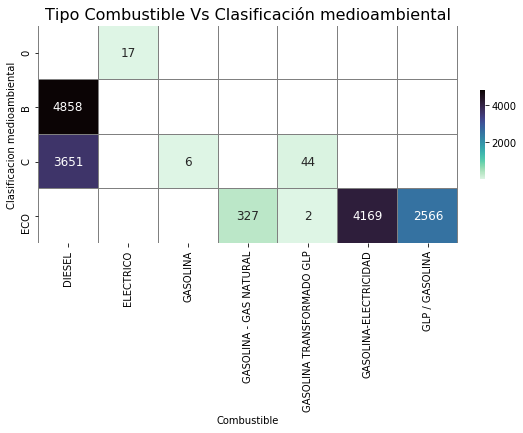

In [21]:
fig, ax = plt.subplots(figsize=(8,4))

#We use the function crosstab in pandas to create a contingency table
sns.heatmap(pd.crosstab(df_new["Clasificacion medioambiental"], df_new["Combustible"], values = df_new["Clasificacion medioambiental"], aggfunc = "count"),
            cmap="mako_r", 
            annot=True,
            cbar_kws={'fraction' : 0.01}, # shrink colour bar
            annot_kws={"size": 12},
            fmt='g', #avoids scientific numbers like 2.1e+03 and shows it as is
            linewidth=0.01, # space between cells
            linecolor ="gray",
            ax = ax).set_xticklabels(ax.get_xticklabels());
ax.set_title("Tipo Combustible Vs Clasificación medioambiental", fontsize= 16);

Insights: 
- 'ELECTRICO' fuel type and '0'  Class have a 1 to 1 relationship. 
- All 'GASOLINA' fuel type vehicles are 'C' Class.
- All 'GASOLINA-GAS NATURAL' fuel type vehicles are 'ECO' Class.
- All 'GASOLINA-ELECTRICIDAD' fuel typevehicles  are 'ECO' Class.
- All 'GLP/GASOLINA' fuel type vehicles are 'ECO' Class.

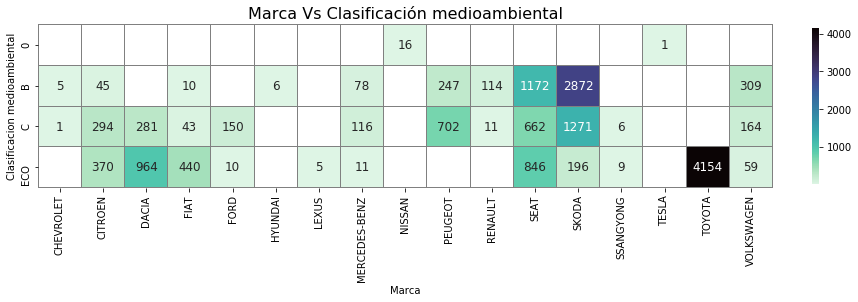

In [22]:
fig, ax = plt.subplots(figsize=(14,3))

#We use the function crosstab in pandas to create a contingency table
sns.heatmap(pd.crosstab(df_new["Clasificacion medioambiental"], df_new["Marca"], values = df_new["Clasificacion medioambiental"], aggfunc = "count"),
            cmap="mako_r", 
            annot=True,
            cbar_kws={'fraction' : 0.01}, # shrink colour bar
            annot_kws={"size": 12},
            fmt='g', #avoids scientific numbers like 2.1e+03 and shows it as is
            linewidth=0.01, # space between cells
            linecolor ="gray",
            ax = ax).set_xticklabels(ax.get_xticklabels());
ax.set_title("Marca Vs Clasificación medioambiental", fontsize= 16);

...*I'd like to have been a passenger of that Tesla taxi driver* :-)

In [23]:
# checking how many vehicles are there by brand
grouped = df_new.groupby(by="Marca").count()["Matricula"]
grouped.sort_values(ascending=False)

Marca
SKODA            4339
TOYOTA           4154
SEAT             2680
DACIA            1245
PEUGEOT           949
CITROEN           709
VOLKSWAGEN        532
FIAT              493
MERCEDES-BENZ     205
FORD              160
RENAULT           125
NISSAN             16
SSANGYONG          15
HYUNDAI             6
CHEVROLET           6
LEXUS               5
TESLA               1
Name: Matricula, dtype: int64

Let's see the frequence of vehicle brands in a more appealing way: using a WordCloud:

In [24]:
from wordcloud import WordCloud, STOPWORDS

#create a sigle string with all values
all_brands = ''
for i in range(len(df_new["Marca"])):
    all_brands = all_brands + ',' + df_new.iloc[i, 3]

In [25]:
all_brands[:220]

',CHEVROLET,CHEVROLET,CHEVROLET,CHEVROLET,CHEVROLET,CHEVROLET,CITROEN,CITROEN,CITROEN,CITROEN,CITROEN,CITROEN,CITROEN,CITROEN,CITROEN,CITROEN,CITROEN,CITROEN,CITROEN,CITROEN,CITROEN,CITROEN,CITROEN,CITROEN,CITROEN,CITROEN'

In [26]:
def paint_wordcloud(text):
    # Create and generate a word cloud image
    my_cloud = WordCloud(stopwords=STOPWORDS, background_color='white', collocations=False).generate(text)

    # Display the generated wordcloud image
    plt.figure(figsize=(15,10))
    plt.imshow(my_cloud, interpolation='bilinear')  
    plt.axis("off")
    plt.show()

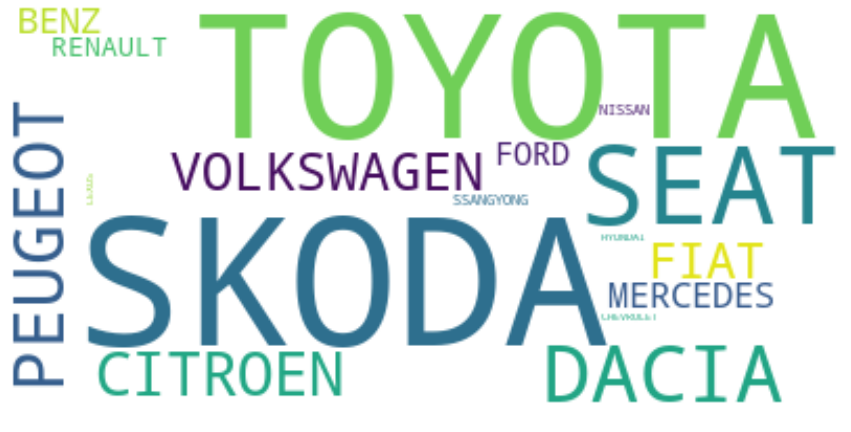

In [27]:
paint_wordcloud(all_brands)

- **Boxplots for target classes and several numerical features**

Let's first  create a new column called 'Ano_Matriculacion' (year of licenceplate registration), as it willbe one feature included in the modelling. 

In [28]:
df_new['Ano_Matriculacion'] = pd.DatetimeIndex(df_new['Fecha Matriculacion']).year

In [29]:
df_new['Ano_Matriculacion'].value_counts()

2013    2282
2015    2170
2017    2026
2014    2010
2016    1897
2018    1462
2012    1426
2011    1214
2010     762
2009     339
2008      48
2007       4
Name: Ano_Matriculacion, dtype: int64

Text(0.5, 1.0, 'Boxplots for classes and Year of license plate registration ')

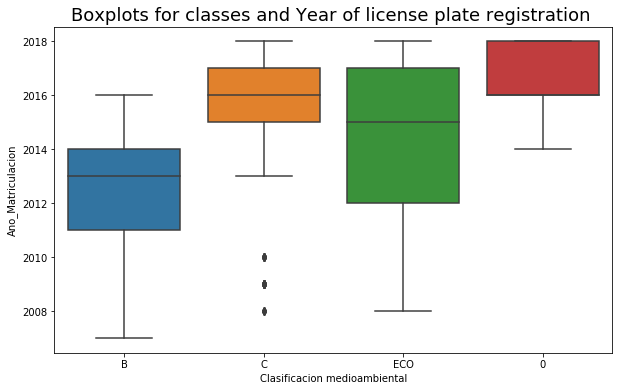

In [30]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=df_new, x='Clasificacion medioambiental', y='Ano_Matriculacion')
ax.set_title('Boxplots for classes and Year of license plate registration ', fontsize= 18)

As we mentioned above, DIESEL fuel type is the one with amore heterogeneus assignation of classes regarding environmental classification. Let's draw a boxplot and check if we can get any insights from it...

In [31]:
df_diesel = df_new[df_new['Combustible'] == 'DIESEL']

Text(0.5, 1.0, 'SOLO VEHICULOS DIESEL: Boxplots para clases y año de matriculación')

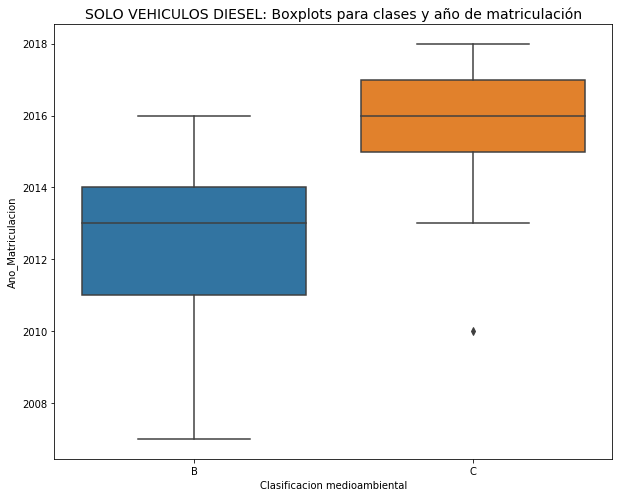

In [32]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df_diesel, x='Clasificacion medioambiental', y='Ano_Matriculacion')
ax.set_title('SOLO VEHICULOS DIESEL: Boxplots para clases y año de matriculación', fontsize= 14)

Nice insight here! Looks like for DIESEL fuel types, year of licence plate registration is important.

Text(0.5, 1.0, 'Boxplots para clases y potencia')

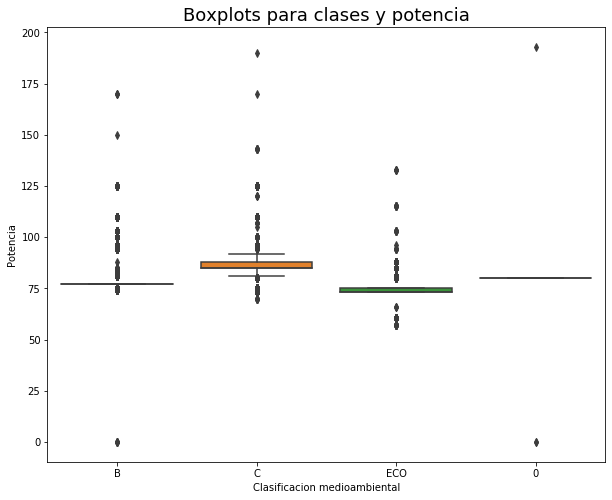

In [33]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df_new, x='Clasificacion medioambiental', y='Potencia')
ax.set_title('Boxplots para clases y potencia', fontsize= 18)

Text(0.5, 1.0, 'Boxplots para clases y Cilindrada')

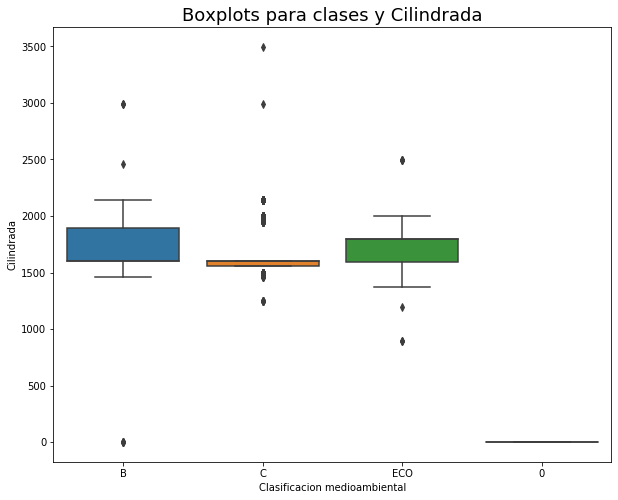

In [34]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df_new, x='Clasificacion medioambiental', y='Cilindrada')
ax.set_title('Boxplots para clases y Cilindrada', fontsize= 18)

- **Correlation matrix for our numerical features**

We will construct a function which allows us to do the same procedure for different datasets:

In [35]:
def get_correlation_matrix(data, method_corr):
    numerical_variables = list(data.select_dtypes(include=['float64', 'int64']).columns)
    data_num = data[numerical_variables].copy()
    corr_numbers = data_num.corr(method = method_corr)
    n = len(numerical_variables)
    fig, ax = plt.subplots(figsize=(8,8))

    sns.heatmap(corr_numbers,
                annot = True,
                square=True,
                linewidth=1,# space between cells
                cmap="BrBG", 
                cbar_kws={'fraction' : 0.03}, # shrink colour bar
                ax = ax);
    ax.set(ylim=(0, n));
    ax.set_title(method_corr.capitalize() +" correlation coefficient: variables numéricas", fontsize=15);

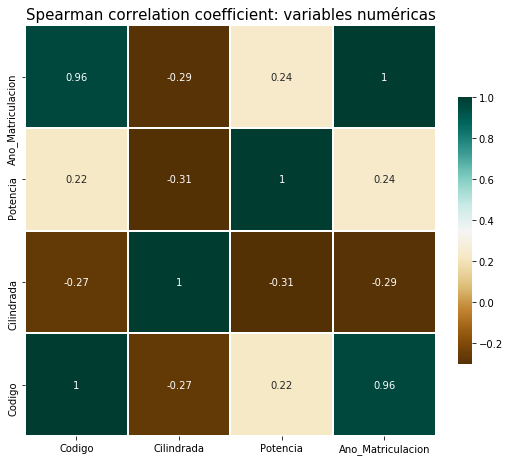

In [36]:
get_correlation_matrix(df_new, 'spearman')

Not much information contained here in chart above...

### Conclusions from EDA and data preparation for modeling

In [37]:
df_new['Clasificacion medioambiental'].value_counts()

ECO    7064
B      4858
C      3701
0        17
Name: Clasificacion medioambiental, dtype: int64

We note that besides the '0' class that has only 17 vehicles, all other classes have significant amount of datapoint to work with. From obove charts, we also see that all electric cars have '0' class, and '0' class is only given if fuel type is electric (1 to 1). So the best we can do here is apply a two step model when deploying this model into production.

1. **First Step**: Check fuel type. 
    - If this is 'ELECTRICO', assign '0' class and stop algorithm. 
    - If this is 'GASOLINA', assign 'C' class and stop algorithm. 
    - If this is 'GASOLINA/ELECTRICIDAD', assign 'ECO' class and stop algorithm. 
    - If this is 'GASOLINA - GAS NATURAL', assign 'ECO' class and stop algorithm. 
    - If this is 'GLP/GASOLINA', assign 'ECO' class and stop algorithm. 
    - Else, go to Step 2.

1. **Second Step**: Apply chosen model to predict class, be it 'ECO', 'B' or 'C'.

So let's drop all rows containing '0' class, let's drop rows with fuel types 'GASOLINA', wich will be assigned 'C' class, and also remove rows with fuel types 'GASOLINA-ELECTRICIDAD', 'GASOLINA - GAS NATURAL' or 'GLP/GASOLINA', because they are going to be assigned directly the 'ECO' Class.


In [38]:
# Dropping all rows with '0' class
df_new2 = df_new[df_new['Clasificacion medioambiental'] != '0']

In [39]:
df_new2['Combustible'].value_counts()

DIESEL                       8509
GASOLINA-ELECTRICIDAD        4169
GLP / GASOLINA               2566
GASOLINA - GAS NATURAL        327
GASOLINA TRANSFORMADO GLP      46
GASOLINA                        6
Name: Combustible, dtype: int64

In [40]:
# Making a list to keep fuel types 'DIESEL', 'GASOLINA TRANSFORMADO GLP'
fuel_types_to_keep = ['DIESEL', 'GASOLINA TRANSFORMADO GLP']

In [41]:
df_new2 = df_new2[df_new2['Combustible'].isin(fuel_types_to_keep)]

In [42]:
df_new2['Combustible'].value_counts()

DIESEL                       8509
GASOLINA TRANSFORMADO GLP      46
Name: Combustible, dtype: int64

In [43]:
df_new2['Clasificacion medioambiental'].value_counts()

B      4858
C      3695
ECO       2
Name: Clasificacion medioambiental, dtype: int64

Ok, we have now a pretty unbalanced class here to wotk with. Class 'ECO'. Let's keep it for now, and wait to see how modeling behaves before dropping these two rows and directly assigning 'ECO' class to all 'GASOLINA TRANSFORMADO GLP' fuel types, as 44 out of 46 rows are classified as ECO (96% accuracy)

In [44]:
df_new2.shape

(8555, 19)

We had an original dataset with 15640 vehicles, and by removing those vehicles that we can classify with 100% accuracy, we end with a dataset with 2 classes to predict ('B' or 'C'), the year of licence plate registration, and two fuel types ('DIESEL', 'GASOLINA TRANSFORMADO GLP'), leaving us with a dataset with 8555 rows. That means that for now, without applying Machine Learning models, we can predict with 100% accuracy the Class if fuel type is among the previoulsy mentioned list, and that happens for 7085 rows, so than means we have right now a 45% accuracy (7085/15640) without applying ML.

- **One hot encoding for Categorical Variables (Fuel type).**

In this version of the ScikitLibrary we are using, we need to transform categorical to numerical variables such as 'Combustible' (Fuel type), transformig this feature into as many columns as different values it has, and assigning each row a 1 ora 0 to these new created columns accordingly.

In [45]:
combust_dummy = pd.get_dummies(df_new2['Combustible'], prefix="Combustible")
df_new2 = pd.concat([df_new2,combust_dummy], axis=1)

In [46]:
df_new2.head()

,Codigo,Matricula,Fecha Matriculacion,Marca,Modelo,Tipo,Variante,Clasificacion medioambiental,Combustible,Cilindrada,...,Numero de Plazas,Fecha inicio de prestacion del servicio de taxi,Eurotaxi,Regimen Especial de Eurotaxi,Fecha inicio Regimen Especial Eurotaxi,Fecha fin Regimen Especial Eurotaxi,Fecha,Ano_Matriculacion,Combustible_DIESEL,Combustible_GASOLINA TRANSFORMADO GLP
31278,1198109,0800GZC,2010-10-18,CHEVROLET,EPICA,KLAL,LV3/134,B,DIESEL,1991,...,5,2010-10-25,NO,NO,NaT,NaT,2018-09-29,2010,1,0
31279,1196804,7686GYS,2010-09-23,CHEVROLET,EPICA,KLAL,LV1/111,C,GASOLINA TRANSFORMADO GLP,1993,...,5,2010-04-10,NO,NO,NaT,NaT,2018-09-29,2010,0,1
31280,1182347,5440GTD,2010-02-02,CHEVROLET,EPICA,KLAL,LV3/134,B,DIESEL,1991,...,5,2010-04-02,NO,NO,NaT,NaT,2018-09-29,2010,1,0
31281,1189908,3259GWN,2010-05-21,CHEVROLET,EPICA,KLAL,LV3/134,B,DIESEL,1991,...,5,2010-05-24,NO,NO,NaT,NaT,2018-09-29,2010,1,0
31282,1194793,2463GYJ,2010-08-18,CHEVROLET,EPICA,KLAL,LV3/134,B,DIESEL,1991,...,5,2010-08-19,NO,NO,NaT,NaT,2018-09-29,2010,1,0


## <a name="section3"> 3. Classification models </a>

Let's first define the features and target we will use for modeling and assign them to *X* and *y* dataframes.

In [47]:
df_new2.columns

Index(['Codigo', 'Matricula', 'Fecha Matriculacion', 'Marca', 'Modelo', 'Tipo',
       'Variante', 'Clasificacion medioambiental', 'Combustible', 'Cilindrada',
       'Potencia', 'Numero de Plazas',
       'Fecha inicio de prestacion del servicio de taxi', 'Eurotaxi',
       'Regimen Especial de Eurotaxi',
       'Fecha inicio Regimen Especial Eurotaxi',
       'Fecha fin Regimen Especial Eurotaxi', 'Fecha', 'Ano_Matriculacion',
       'Combustible_DIESEL', 'Combustible_GASOLINA TRANSFORMADO GLP'],
      dtype='object')

In [48]:
df_new2['Clasificacion medioambiental'].value_counts()

B      4858
C      3695
ECO       2
Name: Clasificacion medioambiental, dtype: int64

In [49]:
# defining features and target for later modelling
features = [ 'Combustible_DIESEL', 'Combustible_GASOLINA TRANSFORMADO GLP', 'Ano_Matriculacion']
target = ['Clasificacion medioambiental']

In [50]:
X = df_new2[features]
y = df_new2[target]

In [51]:
y.nunique()

Clasificacion medioambiental    3
dtype: int64

In [52]:
X.shape

(8555, 3)

In [53]:
y.shape

(8555, 1)

In [54]:
# Applying train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

### 3.1 Random Forest Classifier

In [55]:
#instanciating our model
RFC = RandomForestClassifier(n_estimators=10, random_state=123)

In [56]:
RFC.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [57]:
y_pred = RFC.predict(X_test)

In [58]:
print("y unique values =      ", np.unique(y))
print("y_pred unique values = ",np.unique(y_pred))

y unique values =       ['B' 'C' 'ECO']
y_pred unique values =  ['B' 'C']


Note that those rows with ECO fuel type are not present in our predicted values (there were 2 at the most).

In [59]:
cf_matrix = confusion_matrix(y_pred, y_test)
cf_matrix

array([[1445,   36],
       [  37, 1049]], dtype=int64)

Let's define a function to show the results of the models we try from now on.

In [60]:
def show_model_results(model_name, y_pred, y_test):

    print("***** Results for model = {}".format(model_name))
    print("------------------------------------------------------")

    #plot Confusion matrix 
    cf_matrix = confusion_matrix(y_pred, y_test)
    ax= plt.subplot()
    sns.heatmap(cf_matrix, annot=True, cmap='mako_r',ax = ax, fmt='g'); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['B', 'C']); ax.yaxis.set_ticklabels(['B', 'C']);

    
    accuracy = accuracy_score(y_test, y_pred)  # (TP + TN) / (TP+TN+FP+FN)
    print("Accuracy of the model = {}".format(round(accuracy,3)))
    print("------------------------------------------------------")

    # Checking accuracy, precision and recall. 
    #TP= True Positive, FP= False Positive, TN = True Negative, FN = False Negative

    precision, recall, fscore, support = score(y_test, y_pred)

    print('Precision for classes B and C: {}'.format(np.round(precision,3))) # (TP)/(TP+FP), for each class
    print('Recall for classes B and C: {}'.format(np.round(recall,3))) # (TP)/(TP+FN), for each class
    print('F1-score for classes B and C: {}'.format(np.round(fscore,3))) #f1 score (harmonic mean of precision and recall = 2* (precision*recall)/(precision+recall))
    print('Support for classes B and C: {}'.format(np.round(support,0))) # The support is the number of occurrences of each class in y_true
    
    print("======================================================")

    return

***** Results for model = RFC
------------------------------------------------------
Accuracy of the model = 0.972
------------------------------------------------------
Precision for classes B and C: [0.976 0.966]
Recall for classes B and C: [0.975 0.967]
F1-score for classes B and C: [0.975 0.966]
Support for classes B and C: [1482 1085]


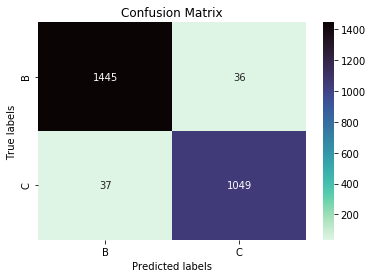

In [61]:
show_model_results('RFC', y_pred, y_test)

In [62]:
# Checking also accuracy using cross-validation:
cvs = cross_val_score(RFC, X, y, scoring= 'accuracy', cv=3).mean()
print("Cross Validation Score = accuracy mean = {}".format(round(cvs,4)))

Cross Validation Score = accuracy mean = 0.9695


We have a good model here. 
Note: Remember that from modelling we discarded a lot of observations because we could predict with 100% accuracy the class depending on fuel type (for fuel types = GASOLINA', 'GASOLINA-GAS NATURAL','GASOLINA-ELECTRICIDAD','GLP/GASOLINA')

### 3.2 Decision Tree Classifier

In [63]:
DTC = DecisionTreeClassifier(random_state=123)

In [64]:
DTC.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [65]:
y_pred = DTC.predict(X_test)

In [66]:
print("y unique values =      ", np.unique(y))
print("y_pred unique values = ",np.unique(y_pred))

y unique values =       ['B' 'C' 'ECO']
y_pred unique values =  ['B' 'C']


***** Results for model = DECISION TREE CLASSIFIER
------------------------------------------------------
Accuracy of the model = 0.972
------------------------------------------------------
Precision for classes B and C: [0.976 0.966]
Recall for classes B and C: [0.975 0.967]
F1-score for classes B and C: [0.975 0.966]
Support for classes B and C: [1482 1085]


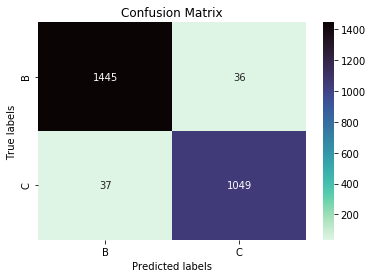

In [67]:
show_model_results("DECISION TREE CLASSIFIER", y_pred, y_test)

In [68]:
# Checking also accuracy using cross-validation:
cvs = cross_val_score(DTC, X, y, scoring= 'accuracy', cv=3).mean()
print("Cross Validation Score = accuracy mean = {}".format(round(cvs,4)))

Cross Validation Score = accuracy mean = 0.9696


As the Decision Tree Classifier (DTC) is al algorithm that uses a similar approach than Random Forest, this could explain the similarity of results obtained.

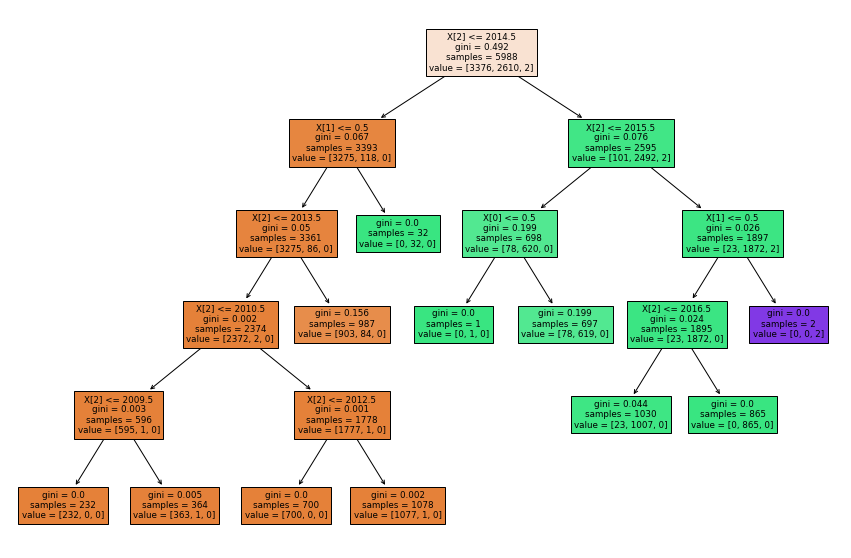

In [72]:
from sklearn import tree

fig, ax = plt.subplots(figsize=(15, 10))  # whatever size you want
tree.plot_tree(DTC, filled=True, ax=ax)
plt.show()

### 3.3 Support Vector Machines

In [68]:
SVC_model = SVC(kernel="linear", C=0.025, random_state=123)

In [69]:
SVC_model.fit(X_train,y_train)

SVC(C=0.025, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=123, shrinking=True, tol=0.001,
    verbose=False)

In [70]:
y_pred = SVC_model.predict(X_test)

In [71]:
print("y unique values =      ", np.unique(y))
print("y_pred unique values = ",np.unique(y_pred))

y unique values =       ['B' 'C' 'ECO']
y_pred unique values =  ['B' 'C']


***** Results for model = SUPPORT VECTOR MACHINE CLASSIFIER
------------------------------------------------------
Accuracy of the model = 0.967
------------------------------------------------------
Precision for classes B and C: [0.968 0.966]
Recall for classes B and C: [0.975 0.957]
F1-score for classes B and C: [0.972 0.961]
Support for classes B and C: [1482 1085]


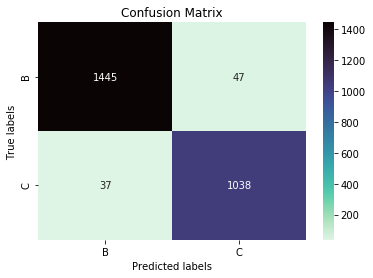

In [72]:
show_model_results("SUPPORT VECTOR MACHINE CLASSIFIER", y_pred, y_test)

In [73]:
# Checking also accuracy using cross-validation:
cvs = cross_val_score(SVC_model, X, y, scoring= 'accuracy', cv=3).mean()
print("Cross Validation Score = accuracy mean = {}".format(round(cvs,4)))

Cross Validation Score = accuracy mean = 0.9643


Note:Accuracy score for SVM are an average of precision, not the formula mentioned is the function above. 
See documentation in: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC 

We can see that this scores a bit lower than the decision tree classifiers. We used linear kernel when instantiating the model. Let's try with another kernel, like 'rbf' (radial basis function).

In [74]:
SVC_model2 = SVC(kernel="rbf", C=0.025, random_state=123)
SVC_model2.fit(X_train,y_train)
y_pred = SVC_model2.predict(X_test)
print("y unique values =      ", np.unique(y))
print("y_pred unique values = ",np.unique(y_pred))

y unique values =       ['B' 'C' 'ECO']
y_pred unique values =  ['B']


***** Results for model = SUPPORT VECTOR MACHINE CLASSIFIER - rbf
------------------------------------------------------
Accuracy of the model = 0.577
------------------------------------------------------
Precision for classes B and C: [0.577 0.   ]
Recall for classes B and C: [1. 0.]
F1-score for classes B and C: [0.732 0.   ]
Support for classes B and C: [1482 1085]


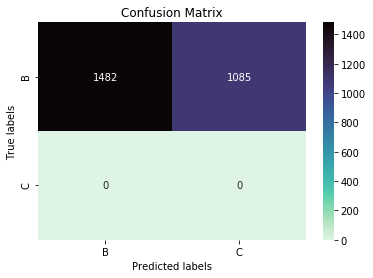

In [75]:
show_model_results("SUPPORT VECTOR MACHINE CLASSIFIER - rbf", y_pred, y_test)

In [76]:
# Checking also accuracy using cross-validation:
cvs = cross_val_score(SVC_model2, X, y, scoring= 'accuracy', cv=3).mean()
print("Cross Validation Score = accuracy mean = {}".format(round(cvs,4)))

Cross Validation Score = accuracy mean = 0.5679


Ok, we don't have a good model here. Let's forget it.

### 3.4 Naive Bayes Classifier

In [77]:
NBC = CategoricalNB()

In [78]:
NBC.fit(X_train,y_train)

CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

In [79]:
y_pred = NBC.predict(X_test)

In [80]:
print("y unique values =      ", np.unique(y))
print("y_pred unique values = ",np.unique(y_pred))

y unique values =       ['B' 'C' 'ECO']
y_pred unique values =  ['B' 'C']


***** Results for model = NAIVE BAYES CLASSIFIER
------------------------------------------------------
Accuracy of the model = 0.972
------------------------------------------------------
Precision for classes B and C: [0.976 0.966]
Recall for classes B and C: [0.975 0.967]
F1-score for classes B and C: [0.975 0.966]
Support for classes B and C: [1482 1085]


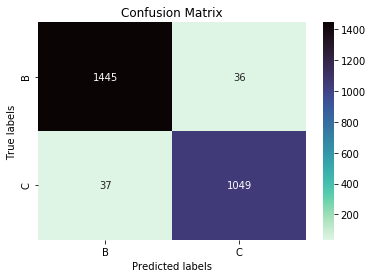

In [81]:
show_model_results("NAIVE BAYES CLASSIFIER", y_pred, y_test)

In [82]:
# Checking also accuracy using cross-validation:
cvs = cross_val_score(NBC, X, y, scoring= 'accuracy', cv=3).mean()
print("Cross Validation Score = accuracy mean = {}".format(round(cvs,4)))

Cross Validation Score = accuracy mean = 0.9658


## <a name="section4"> 4. Model Selection </a>

Ok. Let's make a summary of the scores we have up to now. 

For the first observations where we didn't need a model to predict (7085 rows, 45.3% of total), we had a 100% accuracy.
For the other 8555 observations (54.7% of total), we did apply several cassification algorithms. For quick math, let's take the cross-validation accuracy score (mean) for each model.

Making a quick weighted average, we have the following cross-validation accuracy scores:


In [83]:
summary = pd.DataFrame({"model": ["Random Forest","Decision Tree","Support Vector Machines", "Naive Bayes"],
                       "Cross_val_score":[0.9695,0.9696,0.9643,0.9658]})

In [84]:
summary

,model,Cross_val_score
0,Random Forest,0.9695
1,Decision Tree,0.9696
2,Support Vector Machines,0.9643
3,Naive Bayes,0.9658


In [85]:
summary['Total_score'] = summary['Cross_val_score']*.547 +(1*.453)

In [86]:
summary

,model,Cross_val_score,Total_score
0,Random Forest,0.9695,0.983317
1,Decision Tree,0.9696,0.983371
2,Support Vector Machines,0.9643,0.980472
3,Naive Bayes,0.9658,0.981293


### Chosen model: *Decision Tree Classifier* 
All these models here shown look good, but we will choose this because it has a higher score and would probably use less memory and time. For future work, we can check model resources consumption to decide.

________________

#### What results might we get using Decision Tree algorithm using all 15.640 original observations with all Fuel type available, without doing the two-step approach aforementioned?

In [87]:
df_new.head()

,Codigo,Matricula,Fecha Matriculacion,Marca,Modelo,Tipo,Variante,Clasificacion medioambiental,Combustible,Cilindrada,Potencia,Numero de Plazas,Fecha inicio de prestacion del servicio de taxi,Eurotaxi,Regimen Especial de Eurotaxi,Fecha inicio Regimen Especial Eurotaxi,Fecha fin Regimen Especial Eurotaxi,Fecha,Ano_Matriculacion
31278,1198109,0800GZC,2010-10-18,CHEVROLET,EPICA,KLAL,LV3/134,B,DIESEL,1991,110.0,5,2010-10-25,NO,NO,NaT,NaT,2018-09-29,2010
31279,1196804,7686GYS,2010-09-23,CHEVROLET,EPICA,KLAL,LV1/111,C,GASOLINA TRANSFORMADO GLP,1993,105.0,5,2010-04-10,NO,NO,NaT,NaT,2018-09-29,2010
31280,1182347,5440GTD,2010-02-02,CHEVROLET,EPICA,KLAL,LV3/134,B,DIESEL,1991,110.0,5,2010-04-02,NO,NO,NaT,NaT,2018-09-29,2010
31281,1189908,3259GWN,2010-05-21,CHEVROLET,EPICA,KLAL,LV3/134,B,DIESEL,1991,110.0,5,2010-05-24,NO,NO,NaT,NaT,2018-09-29,2010
31282,1194793,2463GYJ,2010-08-18,CHEVROLET,EPICA,KLAL,LV3/134,B,DIESEL,1991,110.0,5,2010-08-19,NO,NO,NaT,NaT,2018-09-29,2010


In [88]:
df_new.shape

(15640, 19)

In [89]:
combust_dummy = pd.get_dummies(df_new['Combustible'], prefix="Combustible")
df_new = pd.concat([df_new,combust_dummy], axis=1)

In [90]:
df_new.columns

Index(['Codigo', 'Matricula', 'Fecha Matriculacion', 'Marca', 'Modelo', 'Tipo',
       'Variante', 'Clasificacion medioambiental', 'Combustible', 'Cilindrada',
       'Potencia', 'Numero de Plazas',
       'Fecha inicio de prestacion del servicio de taxi', 'Eurotaxi',
       'Regimen Especial de Eurotaxi',
       'Fecha inicio Regimen Especial Eurotaxi',
       'Fecha fin Regimen Especial Eurotaxi', 'Fecha', 'Ano_Matriculacion',
       'Combustible_DIESEL', 'Combustible_ELECTRICO', 'Combustible_GASOLINA',
       'Combustible_GASOLINA - GAS NATURAL',
       'Combustible_GASOLINA TRANSFORMADO GLP',
       'Combustible_GASOLINA-ELECTRICIDAD', 'Combustible_GLP / GASOLINA'],
      dtype='object')

In [91]:
# defining features and target for later modelling
features2 = [ 'Combustible_DIESEL', 'Combustible_ELECTRICO', 'Combustible_GASOLINA',
       'Combustible_GASOLINA - GAS NATURAL',
       'Combustible_GASOLINA TRANSFORMADO GLP',
       'Combustible_GASOLINA-ELECTRICIDAD', 'Combustible_GLP / GASOLINA', 'Ano_Matriculacion']
target2 = ['Clasificacion medioambiental']

In [92]:
X2 = df_new[features2]
y2 = df_new[target2]

In [93]:
np.unique(y2)

array(['0', 'B', 'C', 'ECO'], dtype=object)

In [94]:
X2.shape

(15640, 8)

In [95]:
y2.shape

(15640, 1)

In [96]:
# Applying train/test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=123)

In [97]:
DTC2 = DecisionTreeClassifier(random_state=123)

In [98]:
DTC2.fit(X_train2,y_train2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [99]:
y_pred2 = DTC2.predict(X_test2)

In [100]:
print("y unique values =      ", np.unique(y2))
print("y_pred unique values = ",np.unique(y_pred2))

y unique values =       ['0' 'B' 'C' 'ECO']
y_pred unique values =  ['0' 'B' 'C' 'ECO']


***** Results for model = Decision Tree
------------------------------------------------------
Accuracy of the model = 0.984
------------------------------------------------------
Precision for classes B and C: [1.    0.974 0.966 1.   ]
Recall for classes B and C: [1.    0.973 0.967 1.   ]
F1-score for classes B and C: [1.    0.974 0.966 1.   ]
Support for classes B and C: [   7 1443 1131 2111]


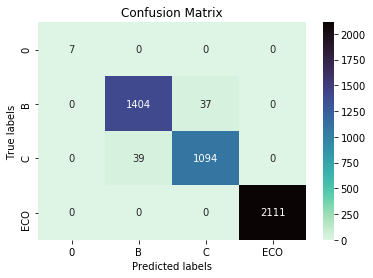

In [101]:
print("***** Results for model = {}".format('Decision Tree'))
print("------------------------------------------------------")

#plot Confusion matrix 
cf_matrix2 = confusion_matrix(y_pred2, y_test2)
ax= plt.subplot()
sns.heatmap(cf_matrix2, annot=True, cmap='mako_r',ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0', 'B', 'C','ECO']); ax.yaxis.set_ticklabels(['0', 'B', 'C','ECO']);

    
accuracy2 = accuracy_score(y_test2, y_pred2)  # (TP + TN) / (TP+TN+FP+FN)
print("Accuracy of the model = {}".format(round(accuracy2,3)))
print("------------------------------------------------------")

# Checking accuracy, precision and recall. 
#TP= True Positive, FP= False Positive, TN = True Negative, FN = False Negative

precision2, recall2, fscore2, support2 = score(y_test2, y_pred2)

print('Precision for classes B and C: {}'.format(np.round(precision2,3))) # (TP)/(TP+FP), for each class
print('Recall for classes B and C: {}'.format(np.round(recall2,3))) # (TP)/(TP+FN), for each class
print('F1-score for classes B and C: {}'.format(np.round(fscore2,3))) #f1 score (harmonic mean of precision and recall = 2* (precision*recall)/(precision+recall))
print('Support for classes B and C: {}'.format(np.round(support2,0))) # The support is the number of occurrences of each class in y_true
    
print("======================================================")

In [102]:
# Checking also accuracy using cross-validation:
cvs2 = cross_val_score(DTC2, X2, y2, scoring= 'accuracy', cv=3).mean()
print("Cross Validation Score = accuracy mean = {}".format(round(cvs2,4)))

Cross Validation Score = accuracy mean = 0.9829


We get a slightly lower `cross_val_scrore` compared to the 0.983371 obtained with the previous approach with Decision Tree Classifier.